In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

adDf = pd.read_csv('Advertising Budget and Sales.csv')

sales = adDf['Sales ($)']
TVbud = adDf['TV Ad Budget ($)']
radBud = adDf['Radio Ad Budget ($)']
newsBud = adDf['Newspaper Ad Budget ($)']

adDf


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
import time
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

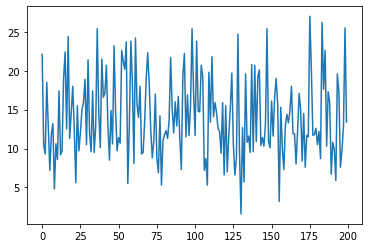

In [26]:
# sales plot
sales = adDf['Sales ($)']

plt.plot(sales)

Text(0, 0.5, 'TV Ad Budget (USD)')

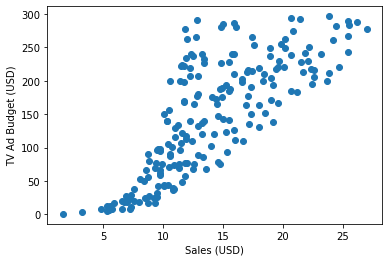

In [27]:
# TV ad budget vs sales

plt.scatter(sales, TVbud)
plt.xlabel('Sales (USD)')
plt.ylabel('TV Ad Budget (USD)')


Text(0, 0.5, 'Radio Ad Budget (USD)')

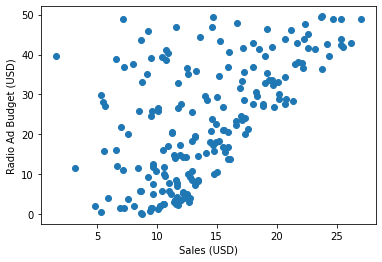

In [28]:
plt.scatter(sales, radBud)
plt.xlabel('Sales (USD)')
plt.ylabel('Radio Ad Budget (USD)')

Text(0, 0.5, 'Newspaper Ad Budget (USD)')

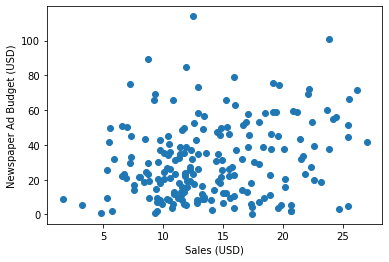

In [29]:
plt.scatter(sales, newsBud)
plt.xlabel('Sales (USD)')
plt.ylabel('Newspaper Ad Budget (USD)')


Text(0, 0.5, 'sales')

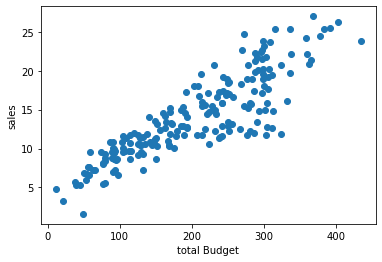

In [30]:
plt.scatter( newsBud+TVbud+radBud,sales)
plt.xlabel('total Budget')
plt.ylabel('sales')

In [31]:
print('data analysis')

data analysis


Text(0.5, 0, 'Newspaper Ad Budget (USD)')

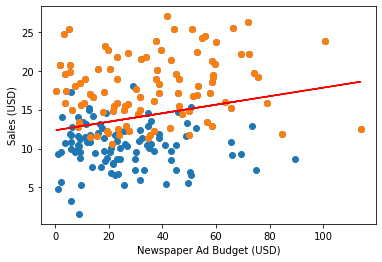

In [32]:
import numpy as np
N = 10000
xr = newsBud
yr = sales
x = np.concatenate((xr[0:100],xr[100:]))
y = np.concatenate((yr[0:100],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
plt.scatter(newsBud,sales)
plt.scatter(newsBud[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]],sales[newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]])
plt.ylabel('Sales (USD)')
plt.xlabel('Newspaper Ad Budget (USD)')


In [33]:
highpp = newsBud+TVbud+radBud >= np.sort(newsBud+TVbud+radBud)[100]
lowpp =newsBud+TVbud+radBud <= np.sort(newsBud+TVbud+radBud)[100]

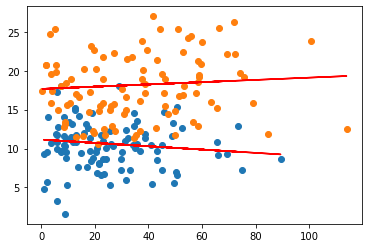

In [34]:
plt.scatter(newsBud[lowpp],sales[lowpp])
xr = newsBud[lowpp]
yr = sales[lowpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
newsmin = p[1]
newsim = p[0]
plt.scatter(newsBud[highpp],sales[highpp])
xr = newsBud[highpp]
yr = sales[highpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
newsmax = p[1]
newsi = p[0]

NameError: name 'xx' is not defined

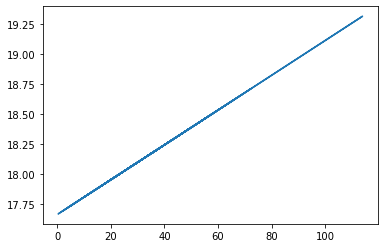

In [35]:
plt.plot(x,p(x))
y = p[0]+p[1]*xx
plt.plot(xx,y)
xx = np.arange(0,100,1)
print(newsmin)
print(newsmax)
print('p[1] is the slope and p[0] is y intercept of average line')

0.05456129249488672
0.2446914049314321


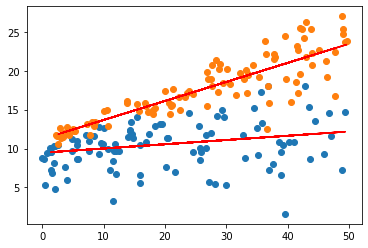

In [36]:
plt.scatter(radBud[lowpp],sales[lowpp])
xr = radBud[lowpp]
yr = sales[lowpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
radmin = p[1]
radim = p[0]
plt.scatter(radBud[highpp],sales[highpp])
xr = radBud[highpp]
yr = sales[highpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
radmax = p[1]
radi = p[0]
print(radmin)
print(radmax)

0.0438215636342733
0.029530872780229454


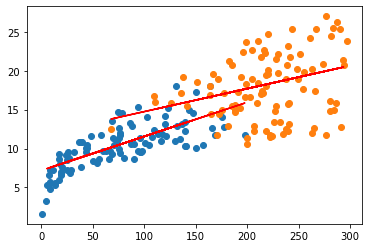

In [37]:
plt.scatter(TVbud[lowpp],sales[lowpp])
xr = TVbud[lowpp]
yr = sales[lowpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
tvmin = p[1]
tvim = p[0]
plt.scatter(TVbud[highpp],sales[highpp])
xr = TVbud[highpp]
yr = sales[highpp]
x = np.concatenate((xr[0:50],xr[100:]))
y = np.concatenate((yr[0:50],yr[100:]))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")
tvmax = p[1]
tvi = p[0]
print(tvmin)
print(tvmax)

In [38]:
print('volatility is a way to measure how off the price is from the expected a volitility of 100 means it is 100 percent more or less than expected')

volatility is a way to measure how off the price is from the expected a volitility of 100 means it is 100 percent more or less than expected


In [43]:
tvminvolatility = abs((tvmin*TVbud[lowpp] +tvim-sales[lowpp])/sales[lowpp])
tvmaxvolatility = abs((tvmax*TVbud[highpp] +tvi-sales[highpp])/sales[highpp])

radminvolatility = abs((radmin*radBud[lowpp] +radim-sales[lowpp])/sales[lowpp])
radminvolatility = radminvolatility[radminvolatility <= 100]
radmaxvolatility = abs((radmax*radBud[highpp] +radi-sales[highpp])/sales[highpp])

newsminvolatility = abs((newsmin*newsBud[lowpp] +newsim-sales[lowpp])/sales[lowpp])
newsmaxvolatility = abs((newsmax*newsBud[highpp] +newsi-sales[highpp])/sales[highpp])
radminvolatility.sum()

31.45980925822288

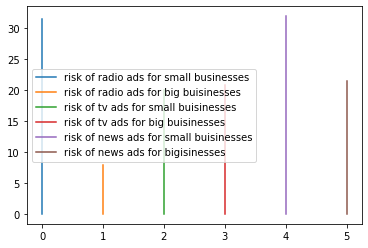

In [46]:
plt.plot([0,0],[0,radminvolatility.sum()], label = 'risk of radio ads for small businesses')
plt.plot([1,1],[0,radmaxvolatility.sum()], label = 'risk of radio ads for big buisinesses')
plt.plot([2,2],[0,tvminvolatility.sum()], label = 'risk of tv ads for small buisinesses')
plt.plot([3,3],[0,tvmaxvolatility.sum()], label = 'risk of tv ads for big buisinesses')
plt.plot([4,4],[0,newsminvolatility.sum()], label = 'risk of news ads for small buisinesses')
plt.plot([5,5],[0,newsmaxvolatility.sum()], label = 'risk of news ads for big buisinesses')
plt.legend()

In [17]:
TVbud[lowpp]

1       44.5
2       17.2
5        8.7
6       57.5
7      120.2
       ...  
192     17.2
194    149.7
195     38.2
196     94.2
197    177.0
Name: TV Ad Budget ($), Length: 101, dtype: float64

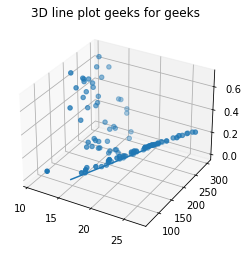

Text(0.11410640661270847, 0.015287359751546202, 'percent increase from expected')

In [56]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis

 
# plotting
ax.scatter3D(sales[highpp],TVbud[highpp],TVmaxvolatility , 'green')
ax.plot3D(tvmax*np.arange(100,300,1) +tvi,np.arange(100,300,1),0)
ax.set_title('percent increase on 3d graph for rich tv buisinesses')
plt.show()




ax.set_xlabel(r'$k_x[\mu m^{-1}]$')
ax.set_ylabel(r'$k_y[\mu m^{-1}]$')
ax.set_zlabel(r'$\epsilon-\omega_X[\gamma_p]$')
ax.set_zlabel('percent increase from expected',labelpad = 30)

In [ ]:
machine learning

In [109]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
x = np.array(TVbud)
y = np.array(sales)

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)
print(lr.predict([[2.4]]))
print('predicts based on value and sklearn')

[7.14668149]


In [ ]:
ignore the rest it is garbage

In [100]:
train_vectors,test_vectors,train_labels,test_labels = sklearn.model_selection.train_test_split(TVbud,sales, train_size=.70, random_state=None, shuffle=True)

In [101]:
rerun_training = True
filename = 'full_face_model.p'
filename

'full_face_model.p'

In [102]:
tmp_vectors = train_vectors
tmp_labels = train_labels

In [103]:
start = time.time()
if rerun_training:
    
    print("Fitting the classifier to the training set")
    param_grid = {'C': [10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0],
                  'gamma': [0.0005, 0.001, 0.005, 0.01]}
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, n_jobs= -1)
    clf = clf.fit(tmp_vectors, tmp_labels)
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)

    #save the model to a file
    pickle.dump(clf, open(filename, 'wb'))

else:
    #read the model from a file
    print("reading pickle file.")
    clf = pickle.load(open(filename, 'rb'))
    print("Best estimator found by grid search:")
    print(clf.best_estimator_)
    
end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[216.8 182.6  97.5  75.1  95.7 171.3 197.6 286.   44.7 237.4  93.9 239.8
 204.1 109.8 109.8 102.7 139.3  31.5 243.2 172.5  23.8 253.8 284.3  69.2
   8.4 210.8 163.5 213.5  25.6  75.5 100.4 220.5  13.1 290.7 265.6 175.1
  94.2  96.2 175.7  76.3  43.1  85.7  27.5 156.6 287.6 184.9 135.2 180.8
 120.5 177.   50.    4.1 104.6  53.5  39.5 199.1 141.3 120.2 276.9  17.9
  75.3  59.6 222.4  19.4   8.7  56.2 262.9 149.8 283.6 229.5  44.5 188.4
  16.9 262.7  69.   90.4 139.5  62.3 240.1 147.3 136.2  18.8 107.4 281.4
  70.6  74.7 280.2 228.3  73.4 205.  224.  199.8   7.8 117.2  38.2 250.9
  19.6 215.4  13.2 149.7 210.7  18.7 131.1 219.8  11.7 142.9 218.5  17.2
   0.7  25.  213.4 273.7 232.1 125.7 163.3 184.9 265.2  87.2 266.9 237.4
 134.3  80.2 187.8  48.3 137.9 202.5  68.4 151.5 248.8 216.4 168.4 123.1
 197.6 220.3 238.2 140.3 121.  280.7 131.7  67.8].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [75]:
from sklearn.cluster import KMeans
import numpy as np
x = np.random.random(13876)

km = KMeans()
km.fit(x.reshape(-1,1))  # -1 will be calculated to be 13876 here

KMeans()

KMeans()

In [78]:
def get_jenks_breaks(data_list, number_class):
    data_list.sort()
    mat1 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat1.append(temp)
    mat2 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat2.append(temp)
    for i in range(1, number_class + 1):
        mat1[1][i] = 1
        mat2[1][i] = 0
        for j in range(2, len(data_list) + 1):
            mat2[j][i] = float('inf')
    v = 0.0
    for l in range(2, len(data_list) + 1):
        s1 = 0.0
        s2 = 0.0
        w = 0.0
        for m in range(1, l + 1):
            i3 = l - m + 1
            val = float(data_list[i3 - 1])
            s2 += val * val
            s1 += val
            w += 1
            v = s2 - (s1 * s1) / w
            i4 = i3 - 1
            if i4 != 0:
                for j in range(2, number_class + 1):
                    if mat2[l][j] >= (v + mat2[i4][j - 1]):
                        mat1[l][j] = i3
                        mat2[l][j] = v + mat2[i4][j - 1]
        mat1[l][1] = 1
        mat2[l][1] = v
    k = len(data_list)
    kclass = []
    for i in range(number_class + 1):
        kclass.append(min(data_list))
    kclass[number_class] = float(data_list[len(data_list) - 1])
    count_num = number_class
    while count_num >= 2:  # print "rank = " + str(mat1[k][count_num])
        idx = int((mat1[k][count_num]) - 2)
        # print "val = " + str(data_list[idx])
        kclass[count_num - 1] = data_list[idx]
        k = int((mat1[k][count_num] - 1))
        count_num -= 1
    return kclass

In [90]:
import numpy as np
import matplotlib.pyplot as plt

def get_jenks_breaks(f,ff):

x = np.random.random(30)
breaks = get_jenks_breaks(x, 5)

for line in breaks:
    plt.plot([line for _ in range(len(x))], 'k--')

plt.plot(x)
plt.grid(True)
plt.show()

IndentationError: expected an indented block (<ipython-input-90-e00e4f87dcdc>, line 6)